In [1]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.4.0'
spark_version = 'spark-3.4.4'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,188 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,625 kB]
Get:13 https://r2u.stat.illinois.edu/u

In [46]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [47]:
# Read in data from S3 Bucket
from pyspark import SparkFiles
url = "https://project4-nyctaxi.s3.us-east-1.amazonaws.com/new_train.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("new_train.csv"), sep=",", header=True)
df.show()

+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+------------------+------------------+-----------------+
|    pickup_datetime|   dropoff_datetime|passenger_count|pickup_location|dropoff_location|store_and_fwd_flag|trip_duration|   pickup_latitude|  pickup_longitude|  dropoff_latitude|dropoff_longitude|
+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+------------------+------------------+-----------------+
|2024-01-03 22:50:16|2024-01-03 22:59:25|            1.0|             50|             236|                 N|          549|218437.82028573466| 985597.5343919232| 223613.7535760244|996155.3867656847|
|2024-01-25 09:33:05|2024-01-25 09:48:58|            1.0|            238|             230|                 N|          953|227717.51805898765| 991712.7644413216| 216099.1397683868|988628.0600467023|
|2024

In [48]:
# Display the schema
df.printSchema()

# Summary statistics
df.describe().show()

# Check for missing values
df.select([df[col].isNull().alias(col) for col in df.columns]).show()

root
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- trip_duration: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)

+-------+-------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+
|summary|    pickup_datetime|   dropoff_datetime|   passenger_count|   pickup_location|  dropoff_location|store_and_fwd_flag|    trip_duration|   pickup_latitude|  pickup_longitude|  dropoff_latitude|dropoff_longitude|
+-------+-------------------+---

In [49]:
print(df_cleaned.columns)

['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_location', 'dropoff_location', 'store_and_fwd_flag', 'trip_duration', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']


In [50]:
indexer = StringIndexer(inputCol="actual_column_name", outputCol="categorical_index")

In [51]:
indexer = StringIndexer(inputCol="store_and_fwd_flag", outputCol="store_and_fwd_index")
df_encoded = indexer.fit(df_cleaned).transform(df_cleaned)
df_encoded.show()

+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+------------------+------------------+-----------------+-------------------+
|    pickup_datetime|   dropoff_datetime|passenger_count|pickup_location|dropoff_location|store_and_fwd_flag|trip_duration|   pickup_latitude|  pickup_longitude|  dropoff_latitude|dropoff_longitude|store_and_fwd_index|
+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+------------------+------------------+-----------------+-------------------+
|2024-01-03 22:50:16|2024-01-03 22:59:25|            1.0|             50|             236|                 N|          549|218437.82028573466| 985597.5343919232| 223613.7535760244|996155.3867656847|                0.0|
|2024-01-25 09:33:05|2024-01-25 09:48:58|            1.0|            238|             230|                 N|          953|2

In [52]:
df_cleaned.select("store_and_fwd_flag").distinct().show()

+------------------+
|store_and_fwd_flag|
+------------------+
|                 Y|
|                 N|
+------------------+



In [53]:
print(df_cleaned.columns)

['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_location', 'dropoff_location', 'store_and_fwd_flag', 'trip_duration', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']


In [54]:
indexer = StringIndexer(inputCol="store_and_fwd_flag", outputCol="store_and_fwd_index")
df_encoded = indexer.fit(df_cleaned).transform(df_cleaned)
df_encoded.show()

+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+------------------+------------------+-----------------+-------------------+
|    pickup_datetime|   dropoff_datetime|passenger_count|pickup_location|dropoff_location|store_and_fwd_flag|trip_duration|   pickup_latitude|  pickup_longitude|  dropoff_latitude|dropoff_longitude|store_and_fwd_index|
+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+------------------+------------------+-----------------+-------------------+
|2024-01-03 22:50:16|2024-01-03 22:59:25|            1.0|             50|             236|                 N|          549|218437.82028573466| 985597.5343919232| 223613.7535760244|996155.3867656847|                0.0|
|2024-01-25 09:33:05|2024-01-25 09:48:58|            1.0|            238|             230|                 N|          953|2

In [55]:
df_cleaned.select("store_and_fwd_flag").distinct().show()

+------------------+
|store_and_fwd_flag|
+------------------+
|                 Y|
|                 N|
+------------------+



In [56]:
df_cleaned = df_cleaned.fillna({"store_and_fwd_flag": "N"})

In [57]:
# Encode pickup_location
pickup_indexer = StringIndexer(inputCol="pickup_location", outputCol="pickup_location_index")
df_encoded = pickup_indexer.fit(df_cleaned).transform(df_cleaned)

# Encode dropoff_location
dropoff_indexer = StringIndexer(inputCol="dropoff_location", outputCol="dropoff_location_index")
df_encoded = dropoff_indexer.fit(df_encoded).transform(df_encoded)

In [58]:
indexer = StringIndexer(inputCol="store_and_fwd_flag", outputCol="store_and_fwd_index")
df_encoded = indexer.fit(df_cleaned).transform(df_cleaned)

# Verify the new column
print(df_encoded.columns)

['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_location', 'dropoff_location', 'store_and_fwd_flag', 'trip_duration', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'store_and_fwd_index']


In [59]:
feature_columns = [
    "passenger_count",
    "pickup_latitude",
    "pickup_longitude",
    "dropoff_latitude",
    "dropoff_longitude",
    "store_and_fwd_index",  # Encoded column
]

In [60]:
print(df_encoded.columns)

['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_location', 'dropoff_location', 'store_and_fwd_flag', 'trip_duration', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'store_and_fwd_index']


In [61]:
feature_columns = [
    "passenger_count",
    "pickup_latitude",
    "pickup_longitude",
    "dropoff_latitude",
    "dropoff_longitude",
    "store_and_fwd_index",  # Encoded column
]

In [62]:

df_encoded = df_encoded.withColumn("passenger_count", col("passenger_count").cast("double"))
df_encoded = df_encoded.withColumn("pickup_latitude", col("pickup_latitude").cast("double"))
df_encoded = df_encoded.withColumn("pickup_longitude", col("pickup_longitude").cast("double"))
df_encoded = df_encoded.withColumn("dropoff_latitude", col("dropoff_latitude").cast("double"))
df_encoded = df_encoded.withColumn("dropoff_longitude", col("dropoff_longitude").cast("double"))

In [63]:
df_encoded.printSchema()

root
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = false)
 |-- trip_duration: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- store_and_fwd_index: double (nullable = false)



In [64]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_prepared = assembler.transform(df_encoded)
df_prepared.select("features", "trip_duration").show(truncate=False)

+------------------------------------------------------------------------------------+-------------+
|features                                                                            |trip_duration|
+------------------------------------------------------------------------------------+-------------+
|[1.0,218437.82028573466,985597.5343919232,223613.7535760244,996155.3867656847,0.0]  |549          |
|[1.0,227717.51805898765,991712.7644413216,216099.1397683868,988628.0600467023,0.0]  |953          |
|[1.0,219305.82782555217,993769.0237137815,191376.74953083202,935996.8210162065,0.0] |2466         |
|[1.0,216099.1397683868,988628.0600467023,211948.91240008172,984272.7786326221,0.0]  |467          |
|[1.0,195528.92479920073,981057.2642958593,198691.52543753176,979792.331028984,0.0]  |394          |
|[1.0,215447.5272239114,990428.525989642,221132.7753491493,989365.0684741095,0.0]    |994          |
|[1.0,219305.82782555217,993769.0237137815,215447.5272239114,990428.525989642,0.0]   |326  

In [65]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler

# Cast string columns to numeric types
df_encoded = df_encoded.withColumn("passenger_count", col("passenger_count").cast("double"))
df_encoded = df_encoded.withColumn("pickup_latitude", col("pickup_latitude").cast("double"))
df_encoded = df_encoded.withColumn("pickup_longitude", col("pickup_longitude").cast("double"))
df_encoded = df_encoded.withColumn("dropoff_latitude", col("dropoff_latitude").cast("double"))
df_encoded = df_encoded.withColumn("dropoff_longitude", col("dropoff_longitude").cast("double"))

# Verify schema
df_encoded.printSchema()

# Prepare features
feature_columns = [
    "passenger_count",
    "pickup_latitude",
    "pickup_longitude",
    "dropoff_latitude",
    "dropoff_longitude",
    "store_and_fwd_index",
]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_prepared = assembler.transform(df_encoded)

# Display a sample
df_prepared.select("features", "trip_duration").show(truncate=False)

root
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = false)
 |-- trip_duration: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- store_and_fwd_index: double (nullable = false)

+------------------------------------------------------------------------------------+-------------+
|features                                                                            |trip_duration|
+------------------------------------------------------------------------------------+-------------+
|[1.0,218437.82028573466,985597.5343919232,223613.7535760244,996155.3867656847,0.0]  |549          |
|[1.0,227717.

In [66]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [67]:
# Define KMeans model with 3 clusters
kmeans = KMeans(featuresCol="features", k=3)

# Fit the model
kmeans_model = kmeans.fit(df_prepared)

# Make predictions (assign cluster labels to each data point)
predictions = kmeans_model.transform(df_prepared)

# Show the first few predictions with cluster labels
predictions.select("features", "prediction").show(5, truncate=False)

+-----------------------------------------------------------------------------------+----------+
|features                                                                           |prediction|
+-----------------------------------------------------------------------------------+----------+
|[1.0,218437.82028573466,985597.5343919232,223613.7535760244,996155.3867656847,0.0] |0         |
|[1.0,227717.51805898765,991712.7644413216,216099.1397683868,988628.0600467023,0.0] |0         |
|[1.0,219305.82782555217,993769.0237137815,191376.74953083202,935996.8210162065,0.0]|0         |
|[1.0,216099.1397683868,988628.0600467023,211948.91240008172,984272.7786326221,0.0] |0         |
|[1.0,195528.92479920073,981057.2642958593,198691.52543753176,979792.331028984,0.0] |0         |
+-----------------------------------------------------------------------------------+----------+
only showing top 5 rows



In [69]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

# Calculate the Silhouette score
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette with squared Euclidean distance = {silhouette}")

Silhouette with squared Euclidean distance = 0.8749153300276516


In [70]:
# Get the cluster centers
centers = kmeans_model.clusterCenters()

# Print the centers
for center in centers:
    print(center)

[1.33242395e+00 2.15402718e+05 9.91018975e+05 2.15279674e+05
 9.90818668e+05 3.94251350e-03]
[1.42816063e+00 1.75518030e+05 1.04258034e+06 2.08412615e+05
 9.95629054e+05 2.59503437e-03]
[1.40864408e+00 1.99083333e+05 1.01528059e+06 1.83538384e+05
 1.03610981e+06 4.04454440e-03]


In [71]:
from pyspark.ml.feature import PCA

# Apply PCA to reduce the dimensionality of the features
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(predictions)
pca_result = pca_model.transform(predictions)

# Show the reduced features
pca_result.select("pca_features", "prediction").show(5, truncate=False)

+----------------------------------------+----------+
|pca_features                            |prediction|
+----------------------------------------+----------+
|[-766800.0141136758,-1070132.739303889] |0         |
|[-766406.4554003263,-1067198.331563394] |0         |
|[-767202.3219147645,-1025467.9159673286]|0         |
|[-770960.5392292823,-1057210.7587284418]|0         |
|[-780127.8178034119,-1035625.9538139063]|0         |
+----------------------------------------+----------+
only showing top 5 rows



In [72]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import col

# Cast string columns to numeric types (if not done earlier)
df_encoded = df_encoded.withColumn("passenger_count", col("passenger_count").cast("double"))
df_encoded = df_encoded.withColumn("pickup_latitude", col("pickup_latitude").cast("double"))
df_encoded = df_encoded.withColumn("pickup_longitude", col("pickup_longitude").cast("double"))
df_encoded = df_encoded.withColumn("dropoff_latitude", col("dropoff_latitude").cast("double"))
df_encoded = df_encoded.withColumn("dropoff_longitude", col("dropoff_longitude").cast("double"))

# Prepare features
feature_columns = [
    "passenger_count",
    "pickup_latitude",
    "pickup_longitude",
    "dropoff_latitude",
    "dropoff_longitude",
    "store_and_fwd_index",
]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_prepared = assembler.transform(df_encoded)

# KMeans Clustering
kmeans = KMeans(featuresCol="features", k=3)  # You can change k to the desired number of clusters
kmeans_model = kmeans.fit(df_prepared)

# Make predictions (assign clusters)
predictions = kmeans_model.transform(df_prepared)

# Show some predictions
predictions.select("features", "prediction").show(5, truncate=False)

# Evaluate clustering (Silhouette Score)
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette with squared Euclidean distance = {silhouette}")

# Get the cluster centers
centers = kmeans_model.clusterCenters()
for center in centers:
    print(center)

# Optionally, apply PCA for dimensionality reduction and visualization
from pyspark.ml.feature import PCA
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(predictions)
pca_result = pca_model.transform(predictions)

# Show PCA results
pca_result.select("pca_features", "prediction").show(5, truncate=False)

+-----------------------------------------------------------------------------------+----------+
|features                                                                           |prediction|
+-----------------------------------------------------------------------------------+----------+
|[1.0,218437.82028573466,985597.5343919232,223613.7535760244,996155.3867656847,0.0] |0         |
|[1.0,227717.51805898765,991712.7644413216,216099.1397683868,988628.0600467023,0.0] |0         |
|[1.0,219305.82782555217,993769.0237137815,191376.74953083202,935996.8210162065,0.0]|0         |
|[1.0,216099.1397683868,988628.0600467023,211948.91240008172,984272.7786326221,0.0] |0         |
|[1.0,195528.92479920073,981057.2642958593,198691.52543753176,979792.331028984,0.0] |0         |
+-----------------------------------------------------------------------------------+----------+
only showing top 5 rows

Silhouette with squared Euclidean distance = 0.8749153300276516
[1.33242395e+00 2.15402718e+05 9.91018

In [75]:
df_sampled = df_prepared.sample(withReplacement=False, fraction=0.1)
pca_model = pca.fit(df_sampled)
pca_result = pca_model.transform(df_sampled)

In [77]:
from pyspark.ml.feature import PCA
from pyspark.ml import Pipeline

# Assuming 'features' is the column containing the input vectors for PCA
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(df_clustered)  # Fit PCA
df_clustered = pca_model.transform(df_clustered)  # Apply PCA

# Now 'pca_features' should exist in the DataFrame
df_pca_with_predictions = df_clustered.select("pca_features", "prediction")

In [78]:
df_clustered.columns

['pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_location',
 'dropoff_location',
 'store_and_fwd_flag',
 'trip_duration',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'store_and_fwd_index',
 'features',
 'prediction',
 'pca_features']

In [80]:
# Extract PCA features and cluster predictions
df_pca_with_predictions = df_clustered.select("pca_features", "prediction")

# Convert to Pandas DataFrame for plotting
pca_pd = df_pca_with_predictions.toPandas()

# Optional: View the first few rows
print(pca_pd.head())

                                pca_features  prediction
0   [-766800.0141136758, -1070132.739303889]           1
1   [-766406.4554003263, -1067198.331563394]           1
2  [-767202.3219147645, -1025467.9159673286]           2
3  [-770960.5392292823, -1057210.7587284418]           2
4  [-780127.8178034119, -1035625.9538139063]           2


In [82]:
df_prepared.show(5)  # Show the first few rows to verify the transformation is correct

+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+-----------------+------------------+-----------------+-------------------+--------------------+
|    pickup_datetime|   dropoff_datetime|passenger_count|pickup_location|dropoff_location|store_and_fwd_flag|trip_duration|   pickup_latitude| pickup_longitude|  dropoff_latitude|dropoff_longitude|store_and_fwd_index|            features|
+-------------------+-------------------+---------------+---------------+----------------+------------------+-------------+------------------+-----------------+------------------+-----------------+-------------------+--------------------+
|2024-01-03 22:50:16|2024-01-03 22:59:25|            1.0|             50|             236|                 N|          549|218437.82028573466|985597.5343919232| 223613.7535760244|996155.3867656847|                0.0|[1.0,218437.82028...|
|2024-01-25 09:33:05|2024-01-25 09:48:58|   

In [83]:
# Reduce the number of rows by selecting a sample
df_sampled = df_prepared.limit(1000)  # Use only 1000 rows for PCA

# Apply PCA
pca_result = pca.fit(df_sampled).transform(df_sampled)

In [84]:
pca_result

DataFrame[pickup_datetime: string, dropoff_datetime: string, passenger_count: double, pickup_location: string, dropoff_location: string, store_and_fwd_flag: string, trip_duration: string, pickup_latitude: double, pickup_longitude: double, dropoff_latitude: double, dropoff_longitude: double, store_and_fwd_index: double, features: vector, pca_features: vector]

In [85]:
df_clustered.columns

['pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_location',
 'dropoff_location',
 'store_and_fwd_flag',
 'trip_duration',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'store_and_fwd_index',
 'features',
 'prediction',
 'pca_features']

In [86]:
df_pca_with_predictions = df_clustered.select("features", "prediction")


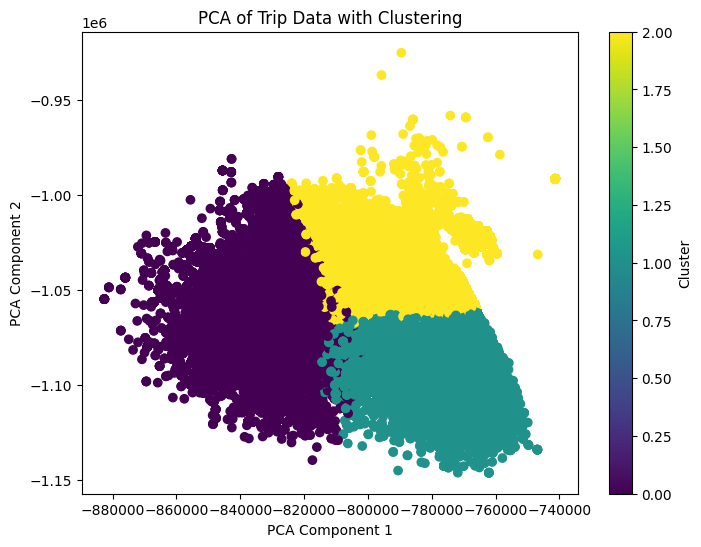

In [89]:
import matplotlib.pyplot as plt

# Extract PCA components and cluster predictions
pca_pd['pca1'] = pca_pd['pca_features'].apply(lambda x: x[0])  # First component
pca_pd['pca2'] = pca_pd['pca_features'].apply(lambda x: x[1])  # Second component

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_pd['pca1'], pca_pd['pca2'], c=pca_pd['prediction'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Trip Data with Clustering')
plt.colorbar(label='Cluster')
plt.show()

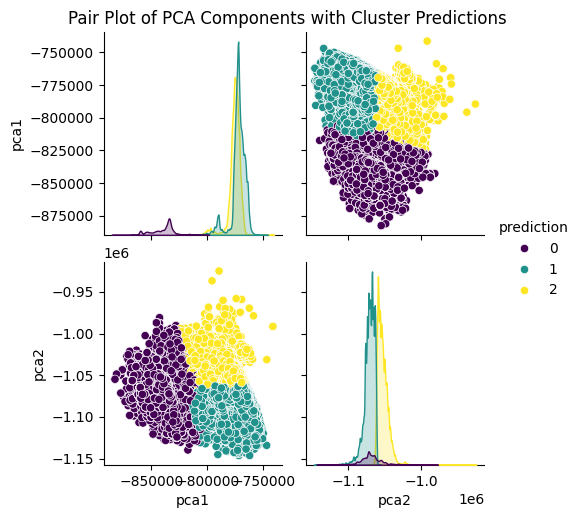

In [90]:
import seaborn as sns

# Pair plot to visualize the PCA components with cluster labels
sns.pairplot(pca_pd, hue='prediction', vars=['pca1', 'pca2'], palette='viridis')
plt.suptitle('Pair Plot of PCA Components with Cluster Predictions', y=1.02)
plt.show()

<ipython-input-91-c2d102805dfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prediction', data=pca_pd, palette='viridis')


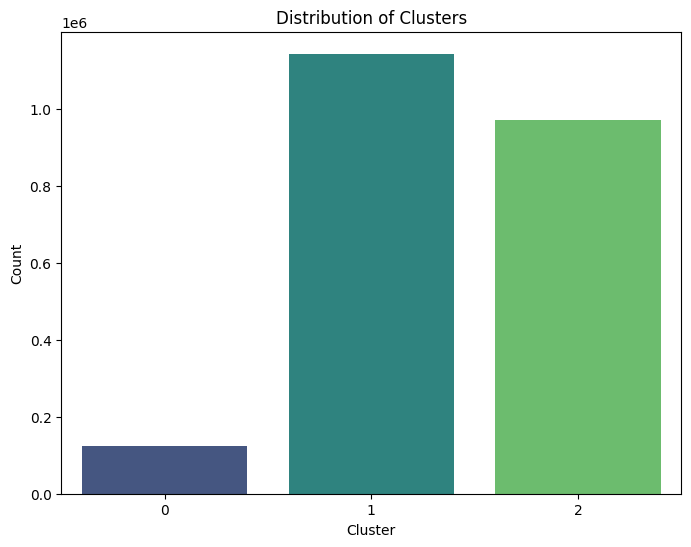

In [91]:
# Distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='prediction', data=pca_pd, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

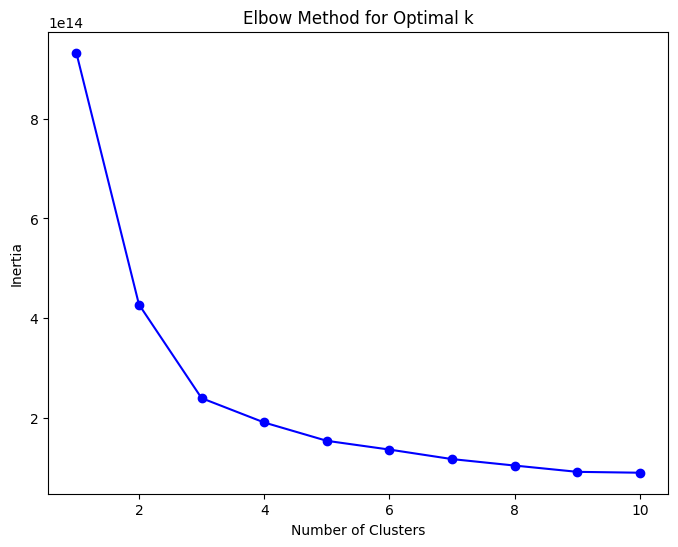

In [92]:
from sklearn.cluster import KMeans
import numpy as np

# Elbow plot to determine the optimal number of clusters
inertia = []
max_k = 10  # Adjust the maximum number of clusters to test
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_pd[['pca1', 'pca2']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k+1), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

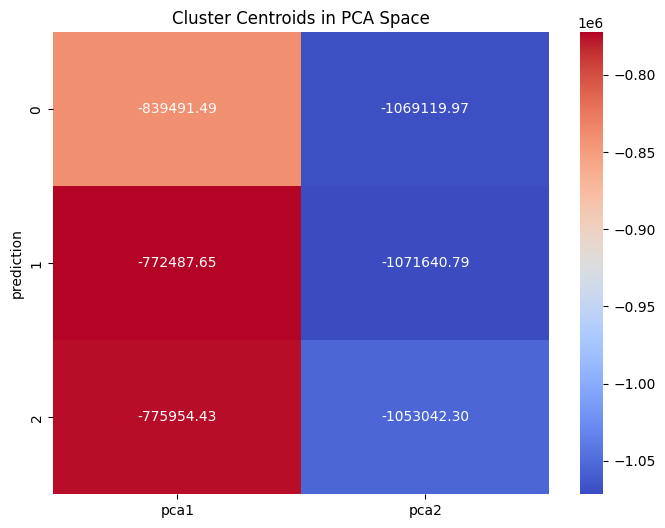

In [93]:
# Pivot the dataframe for heatmap
cluster_pca = pca_pd.groupby('prediction')[['pca1', 'pca2']].mean()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_pca, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Cluster Centroids in PCA Space')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='pca1', y='pca2', data=pca_pd, hue='prediction', fill=True, palette='viridis', common_norm=False)
plt.title('2D Density Plot of PCA Components with Cluster Predictions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()